In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
# import metpy.calc as mpcalc
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import xarray as xr
import os
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
import pandas as pd
from dask.diagnostics import ProgressBar
import matplotlib.cm as cm
%xmode Plain

Exception reporting mode: Plain


In [ ]:
ds = xr.open_dataset

##### Plotting $\mathcal{D}_\ell(\mathbf{u},b,q)$ norms

In [8]:
varname = '_spec_hum_norm'
varlabel = r'{\hat{q}}'
ds_DlT = xr.open_dataset(f'/home/users/emg97/emgScripts/LoSSETT/out_nc/DRdir2dt{varname}_Nlmax5_kscaleRAL3n2560_0p5_DS_20160801.nc')
DlT = ds_DlT[f'LoSSET_DR{varname}']
DlT_comp = DlT.sel(n_scales=3).mean(dim=['time'])
# DlT_comp.plot()
lat = ds_DlT['latitude']
lon = ds_DlT['longitude']

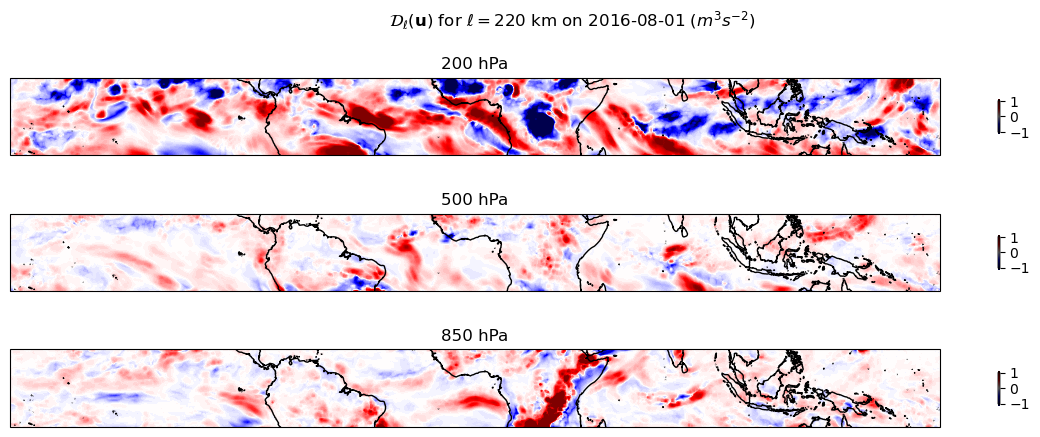

In [31]:
ds_Dlu = xr.open_dataset('/gws/nopw/j04/kscale/USERS/emg/data/LoSSETT_out/channel_n2560_RAL3p2/DRdir2dt_Nlmax5_kscaleRAL3n2560_0p5_DS_20160909.nc')
Dlu = ds_Dlu['LoSSET_DR'].sel(n_scales=3).mean(dim=['time'])

fig, axes = plt.subplots(figsize=(15,5),nrows=3,subplot_kw={'projection':ccrs.PlateCarree()})
lvls = [200,500,850]
lim = 1e-0
for i,lvl in enumerate(lvls):
    ax = axes[i]
    ax.coastlines()
    CB = ax.contourf(lon,lat,-Dlu.sel(level=lvl).T,cmap='seismic',levels=np.linspace(-lim,lim,100),extend='both')
    cb = plt.colorbar(CB,shrink=0.3)
    cb.set_ticks([-lim,0,lim])
    ax.set_ylim([-15,15])
    ax.set_title(f'{lvl} hPa')
plt.suptitle(r'$\mathcal{D}_\ell (\mathbf{u})$ for $\ell=220$ km on 2016-08-01 ($m^3 s^{-2}$)')
# plt.savefig('/home/users/emg97/emgPlots/LO_Dlu_3layers_l220km_20160801_15NS.png',dpi=600,bbox_inches='tight')

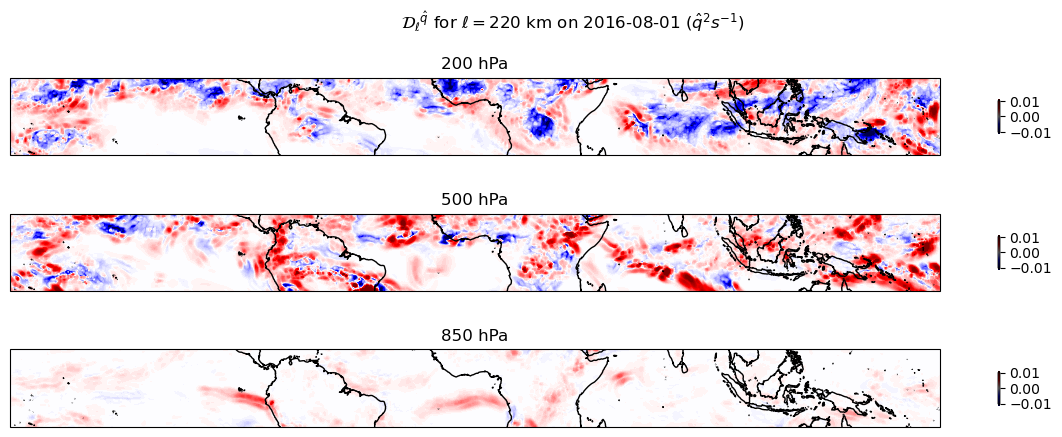

In [13]:
fig, axes = plt.subplots(figsize=(15,5),nrows=3,subplot_kw={'projection':ccrs.PlateCarree()})
lvls = [200,500,850]
lim = 1e-2
for i,lvl in enumerate(lvls):
    ax = axes[i]
    ax.coastlines()
    CB = ax.contourf(lon,lat,-DlT_comp.sel(level=lvl).T,cmap='seismic',levels=np.linspace(-lim,lim,100),extend='both')
    cb = plt.colorbar(CB,shrink=0.3)
    cb.set_ticks([-lim,0,lim])
    ax.set_ylim([-15,15])
    ax.set_title(f'{lvl} hPa')
plt.suptitle(r'$\mathcal{D}_\ell$'+f'$^{varlabel}$ for $\ell=220$ km on 2016-08-01 (${varlabel}^2$'+r'$ s^{-1}$)')
plt.savefig(f'/home/users/emg97/emgPlots/LO_Dl{varname}_3layers_l220km_20160801_15NS.png',dpi=600,bbox_inches='tight')

##### rm

In [18]:
ds_DR_python = xr.open_dataset('/home/users/emg97/emgScripts/LoSSETT/out_nc/DRdir2dt_l2_0p25_Jan1st2005.nc')
DRdir_py = ds_DR_python['LoSSET_DR']
lat_py = ds_DR_python['latitude']
lon_py = ds_DR_python['longitude']
time_py = ds_DR_python['time']
# DRdir_py
# lon_py
ds_DR_py_l1 = xr.open_dataset('/home/users/emg97/emgScripts/LoSSETT/out_nc/DRdir2dt_l1_0p25_Jan1st2005.nc')
DRdir2dt_py_l1 = ds_DR_py_l1['LoSSET_DR']

In [4]:
ds_DR_matlab = xr.open_dataset('/home/users/emg97/DRdir_Nlmax1_1day.nc')
DRdir_m = ds_DR_matlab['DRdir']
lat_m = ds_DR_matlab['latitude']
lon_m = ds_DR_matlab['longitude']
time_m = ds_DR_matlab['time']

In [22]:
DRdir_300_20050101_py_l1_t0 = DRdir_py.isel(time=1,level=4,n_scales=0)
# DRdir_300_20050101_py_l2_t0 = DRdir_py.isel(time=1,level=4,n_scales=1)
DRdir_300_20050101_py_l1Nlmax1_t0 = DRdir2dt_py_l1.isel(time=1,level=4,n_scales=0)
DRdir_300_20050101_II_m  = DRdir_m[1,0,4,:,:]

Text(0.5, 1.0, '$\\ell=1$, Nlmax = 1')

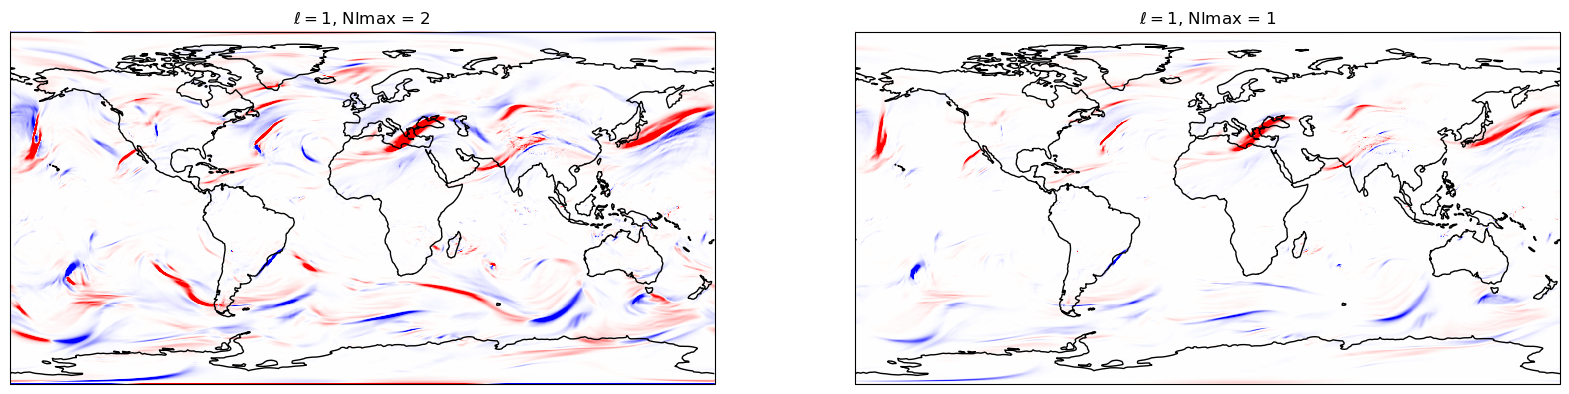

In [23]:
fig,ax = plt.subplots(1,2,figsize=(20,10),subplot_kw={'projection':ccrs.PlateCarree()})
vlim = 1e-2
ax[0].pcolormesh(lon_py,lat_py,DRdir_300_20050101_py_l1_t0.T,cmap='bwr',vmin=-vlim,vmax=vlim)
ax[0].coastlines()
ax[0].set_title(r'$\ell=1$, Nlmax = 2')

ax[1].pcolormesh(lon_py,lat_py,DRdir_300_20050101_py_l1Nlmax1_t0.T,cmap='bwr',vmin=-vlim,vmax=vlim)
ax[1].coastlines()
ax[1].set_title(r'$\ell=1$, Nlmax = 1')

# ax[0,1].pcolormesh(lon_py,lat_py,DRdir_300_20050101_py_l2_t0.T,cmap='bwr',vmin=-vlim,vmax=vlim)
# ax[0,1].set_title(r'$\ell=2$')
# ax[0,1].coastlines()
# ax[1,0].pcolormesh(lon_py,lat_py,DRdir_300_20050101_py_l1_t0.T-DRdir_300_20050101_py_l2_t0.T,cmap='bwr',vmin=-vlim,vmax=vlim)
# ax[1,0].coastlines()
# ax[1,0].set_title(r'$\ell_1-\ell_2$')
# ax[1,1].pcolormesh(lon_m,lat_m,DRdir_300_20050101_II_m*10,cmap='bwr',vmin=-vlim,vmax=vlim)
# ax[1,1].coastlines()

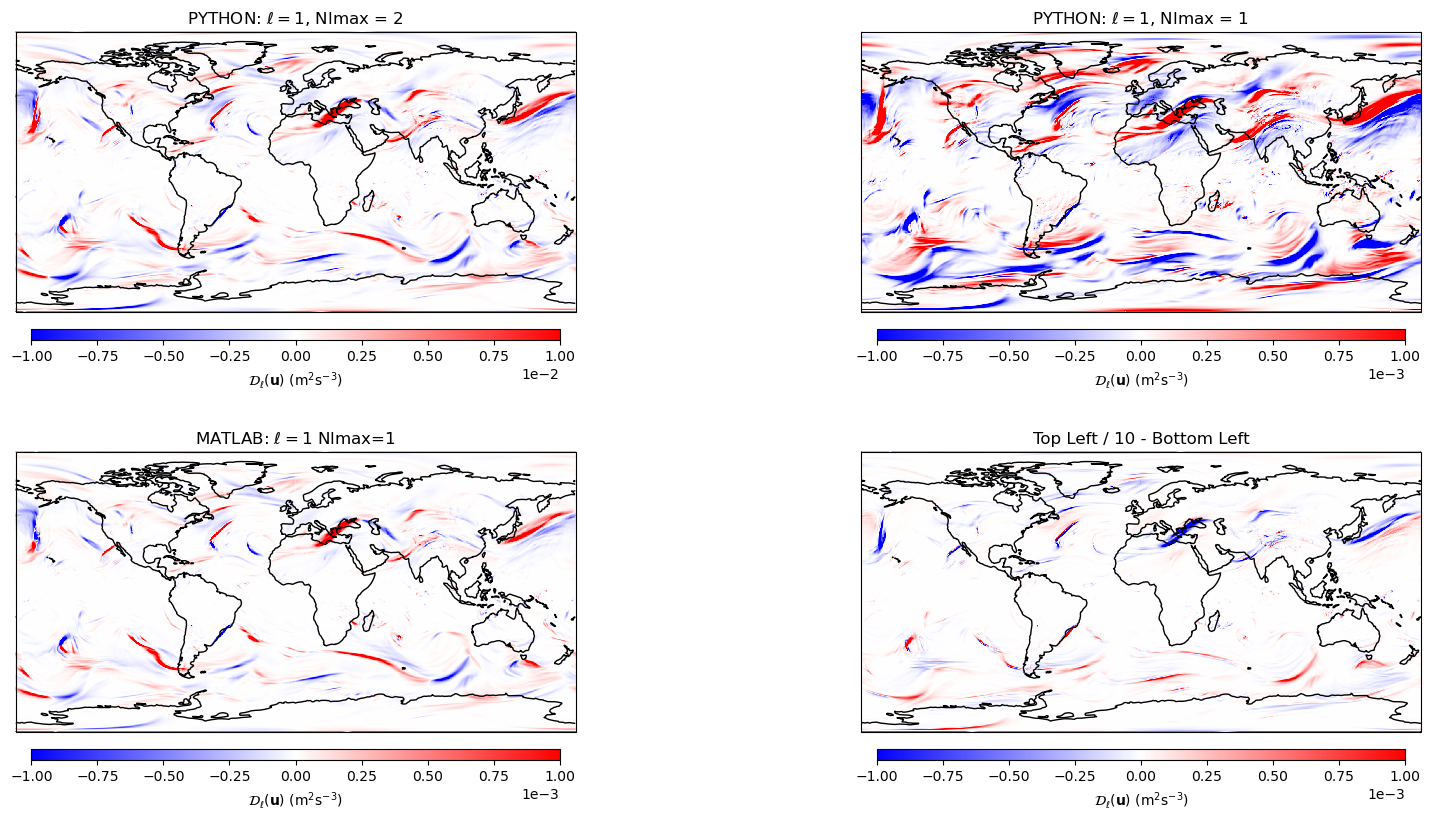

In [31]:
fig,axs = plt.subplots(2,2,figsize=(20,10),subplot_kw={'projection':ccrs.PlateCarree()})

titles = [r"PYTHON: $\ell=1$, Nlmax = 2",r"PYTHON: $\ell=1$, Nlmax = 1",r"MATLAB: $\ell=1$ Nlmax=1","Top Left / 10 - Bottom Left"]
# fig.suptitle(r"$\mathcal{D}_{\ell}(\mathbf{u})$ for $\ell\approx 25$km at 300 hPa",y=0.725,fontsize=20)

diff_m_py = DRdir_300_20050101_II_m - DRdir_300_20050101_py_l1_t0/10

data = [DRdir_300_20050101_py_l1_t0.T,DRdir_300_20050101_py_l1Nlmax1_t0.T,DRdir_300_20050101_II_m,diff_m_py]
lons = [lon_py,lon_py,lon_m,lon_py]
lats = [lat_py,lat_py,lat_m,lat_py]
vmin = [-1e-2,-1e-3,-1e-3,-1e-3]
vmax = [1e-2,1e-3,1e-3,1e-3]

for ax,title,lon,lat,d,vmin_val,vmax_val in zip(axs.flat,titles,lons,lats,data,vmin,vmax):
    ax.set_title(title)
    ax.coastlines()
    mesh=ax.pcolormesh(lon,lat,d,transform=ccrs.PlateCarree(),cmap='bwr',vmin=vmin_val,vmax=vmax_val)

    cbar=fig.colorbar(mesh, ax=ax, orientation='horizontal', shrink=0.75, pad=0.05, aspect=50)
    cbar.set_label(r'$\mathcal{D}_\ell(\mathbf{u})$ (m$^2$s$^{-3}$)')
    cbar.formatter = ticker.ScalarFormatter()
    cbar.formatter.set_scientific(True)
    cbar.formatter.set_powerlimits((-2, 3))
    cbar.update_ticks() 

In [4]:
ds = xr.open_dataset("/home/users/emg97/emgScripts/LoSSETT/out_nc/DRdir2dt_Nlmax5_era5_2016-08-01.nc")
DR_ERA5_20160801 = ds['LoSSET_DR']
DR_ERA5_20160801

<xarray.DataArray 'LoSSET_DR' (n_scales: 5, longitude: 720, latitude: 360,
                               level: 12, time: 8)> Size: 995MB
[124416000 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * level      (level) float64 96B 1e+03 925.0 850.0 700.0 ... 200.0 150.0 100.0
  * n_scales   (n_scales) int64 40B 0 1 2 3 4
  * time       (time) datetime64[ns] 64B 2016-08-01T01:00:00 ... 2016-08-01T2...

In [5]:
with ProgressBar():
    DR_tm = ds['LoSSET_DR'].mean(dim='time').compute()
DR_tm

<xarray.DataArray 'LoSSET_DR' (n_scales: 5, longitude: 720, latitude: 360,
                               level: 12)> Size: 124MB
array([[[[-3.68049756e-02, -2.18851461e-02, -1.94549850e-02, ...,
          -2.41315630e-01, -1.39497494e-01, -4.74093006e-02],
         [-2.82811728e-02, -1.53630595e-02, -1.33352869e-02, ...,
          -1.89937102e-01, -1.17316199e-01, -4.38950362e-02],
         [-1.00547437e-02, -5.08251372e-03, -4.02621252e-03, ...,
          -6.43243743e-02, -4.01794976e-02, -1.73299855e-02],
         ...,
         [-9.46899389e-03, -5.25055781e-03, -4.81077779e-03, ...,
          -5.55871790e-02, -3.27627969e-02, -1.16664452e-02],
         [-2.29645633e-02, -1.17158491e-02, -8.19370937e-03, ...,
          -1.63633194e-01, -9.77054694e-02, -3.47292030e-02],
         [-2.84154819e-02, -1.22329701e-02, -7.75187522e-03, ...,
          -2.19488659e-01, -1.34312013e-01, -5.01476983e-02]],

        [[-3.66421062e-02, -2.16619109e-02, -1.91128170e-02, ...,
          -2.39352517e-01, -1.39022996e-01, -4.73881038e-02],
         [-2.82489458e-02, -1.52917089e-02, -1.31861386e-02, ...,
          -1.88977959e-01, -1.17200429e-01, -4.39157956e-02],
         [-1.00384491e-02, -5.05946314e-03, -3.97637256e-03, ...,
          -6.41228122e-02, -4.01691928e-02, -1.73534970e-02],
...
         [ 1.79217444e+00,  1.79714285e+01,  3.73326991e+01, ...,
          -1.23918225e+02, -7.94043155e+01, -2.73080895e+01],
         [ 3.20396622e+01,  6.11170675e+01,  9.76689117e+01, ...,
          -6.91281621e+01, -4.80971554e+01, -2.01173142e+01],
         [ 5.59539280e+01,  8.97575293e+01,  1.51144774e+02, ...,
          -5.37648193e+00, -5.17946413e+00, -8.37112497e+00]],

        [[-2.98150024e+02, -2.58511084e+02, -2.85758809e+02, ...,
          -1.28937781e+03, -7.31614019e+02, -2.68553362e+02],
         [-2.88222077e+02, -2.12087910e+02, -2.39639030e+02, ...,
          -1.25724773e+03, -7.66024963e+02, -3.00105632e+02],
         [-2.05222051e+02, -1.36700512e+02, -1.46826737e+02, ...,
          -1.00092088e+03, -6.22166622e+02, -2.71537850e+02],
         ...,
         [ 1.50821018e+00,  1.77104128e+01,  3.71862496e+01, ...,
          -1.25162896e+02, -8.03718132e+01, -2.78105352e+01],
         [ 3.13948008e+01,  6.02471436e+01,  9.66306197e+01, ...,
          -7.22412127e+01, -4.97425924e+01, -2.09380511e+01],
         [ 5.49559754e+01,  8.83161754e+01,  1.48942849e+02, ...,
          -1.02928206e+01, -7.28365222e+00, -9.51904259e+00]]]])
Coordinates:
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * level      (level) float64 96B 1e+03 925.0 850.0 700.0 ... 200.0 150.0 100.0
  * n_scales   (n_scales) int64 40B 0 1 2 3 4

In [5]:
# Merging datasets
directory = "/gws/nopw/j04/kscale/USERS/emg/data/LoSSETT_out/ERA5_0p5deg_3h"
dates = pd.date_range(start="2016-08-01", end="2016-09-09").strftime('%Y-%m-%d')

file_paths = [f"{directory}/DRdir2dt_Nlmax5_era5_{date}.nc" for date in dates]
ds = xr.open_mfdataset(file_paths, combine='by_coords',engine='netcdf4')
# ds

##### Animation of tropical $\mathcal{D}_\ell(\mathbf{u})$

In [ ]:
# time = ds['time']
# lev=ds['level']
# DR_slice_anim = ds['LoSSET_DR'].sel(latitude=slice(-15,15),n_scales=3)
# DR_slice_anim_2D = DR_slice_anim.mean(dim='latitude')
# DR_slice_anim_2D
# DR_vertslice_2D_lat = ds.mean(dim='longitude').sel(n_scales=0)
# for i in range(len(time)):
#     data_at_time = DR_vertslice_2D_lat.isel(time=i)
#     print(data_at_time)
with ProgressBar():
    DR_trop_ERA = ds['LoSSET_DR'].sel(latitude=slice(20,-20)).compute()
DR_trop_ERA

[########################################] | 100% Completed | 537.48 s


In [2]:
directory = "/gws/nopw/j04/kscale/USERS/emg/data/LoSSETT_out/ERA5_0p5deg_3h"
dates = pd.date_range(start="2016-08-01", end="2016-09-09").strftime('%Y-%m-%d')

file_paths = [f"{directory}/DRdir2dt_Nlmax5_era5_{date}.nc" for date in dates]
ds = xr.open_mfdataset(file_paths, combine='by_coords',engine='netcdf4')

In [ ]:
# Map
DR_anim = DR_trop_ERA.sel(pressure_level=200,n_scales=0)
time = ds['valid_time']
for i in range(len(time)):
    plt.figure(figsize=(18,3))
    ax = plt.axes(projection=ccrs.PlateCarree())

    data_at_time = DR_anim.isel(valid_time=i)

    lon = data_at_time['longitude']
    lat = data_at_time['latitude']
    ax.set_extent([180,-180,-15,15],crs=ccrs.PlateCarree())
    plt.contourf(lon, lat, data_at_time.T, cmap='bwr', levels=np.arange(-5e-3,5e-3,5e-5),extend='both')
    ax.coastlines()
    cbar=plt.colorbar(orientation='vertical', shrink=0.5, pad=0.025)
    cbar.set_label(r'$\mathcal{D}_\ell(\mathbf{u})$ (m$^2$ s$^{-3}$)')
    ax.axhline(y=0,color='k',linewidth=0.5,linestyle='--')
    cbar.formatter = ticker.ScalarFormatter()
    cbar.formatter.set_scientific(True)
    cbar.formatter.set_powerlimits((-2, 3))
    cbar.update_ticks() 
    cbar.set_ticks([-5e-3,0,5e-3])
    
    file_number = str(i).zfill(3)

    plt.title(f'L = 55 km | DYAMOND Summer | 200hPa | ERA5 | Day: {i//8}')

    plt.savefig(f'/home/users/emg97/emgPlots/frames_LO/frame_{file_number}.png')
    plt.close()

# Slice


# for i in range(len(time)):
#     plt.figure(figsize=(8,4))
#     data_at_time = DR_vertslice_2D_lat.isel(time=i)
#     if isinstance(data_at_time, xr.Dataset):
#         data_at_time = data_at_time.to_array().squeeze()  # Converts to 2D array if it's still 3D
#     elif data_at_time.ndim > 2:
#         data_at_time = data_at_time.squeeze()  # Squeeze dimensions if more than 2D
#     CS = plt.contourf(lat,lev,data_at_time.T,cmap='bwr',extend='both',levels=np.linspace(-5e-4,5e-4,101))
#     plt.gca().invert_yaxis() # The data is sorted by level index (index 12 = 1000hPa)
#     plt.ylabel('Height (hPa)')
#     # plt.title(f'L = 55 km | DYAMOND Summer | 200hPa | 5km conv | Day: {i//8}')
#     plt.xlim([-15,15])
#     cbar = plt.colorbar(CS)
#     cbar.set_label(r'Longitudianlly averaged $D_\ell(\mathbf{u})$ (m$^2$s$^{-3}$)')
#     cbar.formatter = ticker.ScalarFormatter()
#     cbar.formatter.set_scientific(True)
#     cbar.formatter.set_powerlimits((-3, 3))
#     cbar.update_ticks()
#     cbar.set_ticks([-5e-4,0,5e-4])

#     # # Add a small map as an inset
#     # box = ax.get_position()
#     # inset_height = 0.2  # Height of the inset map as a fraction of figure height
#     # inset_bottom = box.y0 - inset_height + 0.0225  # Add a small gap
#     # inset_ax = fig.add_axes([box.x0, inset_bottom, box.width, inset_height], projection=ccrs.PlateCarree())
#     # inset_ax.set_extent([-180, 180, -15, 15], crs=ccrs.PlateCarree())

#     # import cartopy.mpl.ticker as cticker
#     # # Add land with some coloring
#     # inset_ax.add_feature(cfeature.LAND, facecolor='lightgreen')
#     # inset_ax.add_feature(cfeature.COASTLINE)
#     # inset_ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
#     # inset_ax.set_xticklabels(['180°W', '120°W', '60°W', '0°', '60°E', '120°E', '180°E'])
#     # inset_ax.set_yticks([])

#     file_number = str(i).zfill(3)

#     plt.title(f'L = 55 km | DYAMOND Summer | 200hPa | 5km conv | Day: {i//8}')
 
#     plt.savefig(f'/home/users/emg97/emgPlots/frames_LO/frame_{file_number}.png')
#     plt.close()

    

##### Plotting of maps of tropical $\mathcal{D}_\ell(\mathbf{u})$ - time mean

In [7]:
with ProgressBar():
    DR_tm = ds['LoSSET_DR'].mean(dim='time').compute()
# DR_tm

[########################################] | 100% Completed | 142.48 s


In [8]:
DR_tm

<xarray.DataArray 'LoSSET_DR' (n_scales: 5, longitude: 720, latitude: 360,
                               level: 12)> Size: 124MB
array([[[[-7.84432895e-03, -4.23985028e-03, -6.19935515e-03, ...,
           2.38037936e-02,  2.02889964e-02,  1.42733985e-02],
         [-6.39332483e-03, -4.22149209e-03, -5.78351743e-03, ...,
           1.74075963e-02,  1.54286269e-02,  1.12090530e-02],
         [-2.38778063e-03, -1.33156301e-03, -1.94734178e-03, ...,
           7.41881449e-03,  6.27772921e-03,  4.62530484e-03],
         ...,
         [-1.92506225e-03, -1.91983003e-04, -8.15284461e-04, ...,
           6.43261117e-03,  5.36878799e-03,  3.69366426e-03],
         [-4.93709310e-03, -1.32360800e-03, -3.04608342e-03, ...,
           1.77383160e-02,  1.51856253e-02,  1.06114036e-02],
         [-6.22853095e-03, -3.02206477e-03, -5.01705819e-03, ...,
           1.95441439e-02,  1.74787835e-02,  1.28815904e-02]],

        [[-7.89935928e-03, -4.40779089e-03, -6.37936542e-03, ...,
           2.38282120e-02,  2.02482285e-02,  1.42017799e-02],
         [-6.46894037e-03, -4.40879182e-03, -5.98178582e-03, ...,
           1.74211652e-02,  1.53915412e-02,  1.11538719e-02],
         [-2.41835697e-03, -1.40995843e-03, -2.03327268e-03, ...,
           7.41384104e-03,  6.25941785e-03,  4.60222340e-03],
...
         [ 3.44562165e+00,  2.39839416e+01,  2.06679529e+01, ...,
           2.17869598e+01,  2.00782017e+01,  1.37444248e+01],
         [ 1.40112333e+01,  4.24677408e+01,  3.74005445e+01, ...,
           1.77232090e+01,  1.84336892e+01,  1.27734332e+01],
         [ 2.17503299e+01,  5.09846290e+01,  4.54056960e+01, ...,
           6.35981877e+00,  1.06580018e+01,  7.80071127e+00]],

        [[-6.79841624e+01, -6.90684108e+01, -7.35638676e+01, ...,
           1.41763330e+02,  1.08750687e+02,  7.44325523e+01],
         [-6.71224411e+01, -6.32564460e+01, -6.95912722e+01, ...,
           1.38571877e+02,  1.11552944e+02,  7.87131727e+01],
         [-5.15145808e+01, -3.95837866e+01, -4.70413784e+01, ...,
           1.31022421e+02,  1.06114057e+02,  7.63831332e+01],
         ...,
         [ 3.10715173e+00,  2.32660617e+01,  1.99644236e+01, ...,
           2.15546676e+01,  1.99412455e+01,  1.36573260e+01],
         [ 1.35772839e+01,  4.15446445e+01,  3.64499366e+01, ...,
           1.73309816e+01,  1.82477988e+01,  1.26642861e+01],
         [ 2.12684706e+01,  5.00385382e+01,  4.43420708e+01, ...,
           5.84044330e+00,  1.04493474e+01,  7.68708296e+00]]]])
Coordinates:
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * level      (level) float64 96B 1e+03 925.0 850.0 700.0 ... 200.0 150.0 100.0
  * n_scales   (n_scales) int64 40B 0 1 2 3 4

In [11]:
with ProgressBar():
    DR_tropical = DR_tm.sel(latitude=slice(-16,16)).compute()
DR_tropical.latitude

<xarray.DataArray 'latitude' (latitude: 64)> Size: 512B
array([-15.75, -15.25, -14.75, -14.25, -13.75, -13.25, -12.75, -12.25, -11.75,
       -11.25, -10.75, -10.25,  -9.75,  -9.25,  -8.75,  -8.25,  -7.75,  -7.25,
        -6.75,  -6.25,  -5.75,  -5.25,  -4.75,  -4.25,  -3.75,  -3.25,  -2.75,
        -2.25,  -1.75,  -1.25,  -0.75,  -0.25,   0.25,   0.75,   1.25,   1.75,
         2.25,   2.75,   3.25,   3.75,   4.25,   4.75,   5.25,   5.75,   6.25,
         6.75,   7.25,   7.75,   8.25,   8.75,   9.25,   9.75,  10.25,  10.75,
        11.25,  11.75,  12.25,  12.75,  13.25,  13.75,  14.25,  14.75,  15.25,
        15.75])
Coordinates:
  * latitude  (latitude) float64 512B -15.75 -15.25 -14.75 ... 14.75 15.25 15.75
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [ ]:
directory_w = "/gws/nopw/j04/kscale/USERS/dship/ERA5/3hourly"
dates_w = pd.date_range(start="2016-08-01", end="2016-09-09").strftime('%Y%m')

file_paths_w = [f"{directory}/era5_vertical_velocity_{date}_3h_0p5deg.nc" for date in dates]
ds = xr.open_mfdataset(file_paths, combine='by_coords',engine='netcdf4')

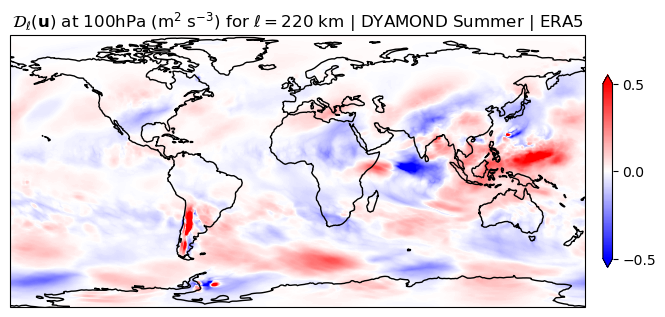

In [72]:
DR_map = DR_tm.sel(pressure_level=100,n_scales=3)
# DR_map
plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree())
lon = ds['longitude']
lat = ds['latitude']
ax.set_extent([180,-180,-85,85],crs=ccrs.PlateCarree())
plt.contourf(lon,lat,DR_map.T,cmap='bwr',levels=np.arange(-0.5,0.5,5e-3),extend='both')
ax.coastlines()
plt.title(r'$\mathcal{D}_\ell(\mathbf{u})$ at 100hPa (m$^2$ s$^{-3}$) for $\ell = 220$ km | DYAMOND Summer | ERA5')
cbar=plt.colorbar(orientation='vertical', shrink=0.5, pad=0.025)
# cbar.set_label(r'$\mathcal{D}_\ell(\mathbf{u})$ (m$^2$ s$^{-3}$)')
# ax.axhline(y=0,color='k',linewidth=0.5,linestyle='--')
cbar.formatter = ticker.ScalarFormatter()
cbar.formatter.set_scientific(True)
cbar.formatter.set_powerlimits((-2, 3))
cbar.update_ticks() 
cbar.set_ticks([-0.5,0,0.5])

plt.savefig('/home/users/emg97/emgPlots/LO_tm_DS_100hPa_ERA5_l220_glob.png',dpi=600,bbox_inches='tight')

##### Vertical slice

In [12]:
# DR_vertslice = DR_tm.sel(latitude=slice(-15,15))
# with ProgressBar():
    # DR_vertslice_2D = DR_tropical.mean(dim='latitude').compute()
with ProgressBar():
    DR_vertslice_2D_lat = DR_tropical.mean(dim='longitude').compute()

# DR_vertslice_2D_lat
# lat_15NS = lat.sel(15,-15)

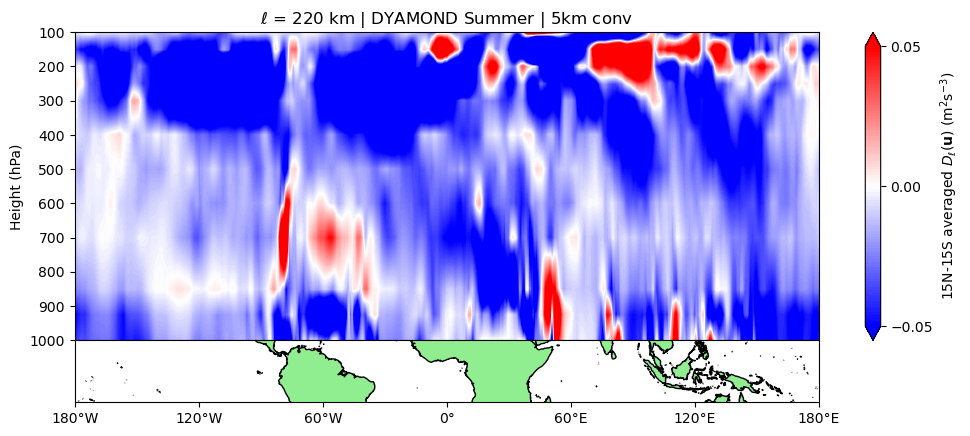

In [27]:
DR_vs_2D_l55 = DR_vertslice_2D.sel(n_scales=3)
lev=ds['level']
fig,ax=plt.subplots(figsize=(12,4))
CS = plt.contourf(lon,lev,DR_vs_2D_l55.T,cmap='bwr',extend='both',levels=np.linspace(-0.05,0.05,101))
plt.gca().invert_yaxis() # The data is sorted by level index (index 12 = 1000hPa)
# ax.set_xlim([-15,15])
plt.ylabel('Height (hPa)')
plt.xlabel(r'Latitude ($^\circ$N)')
# plt.xticks([])
plt.title(r'$\ell$ = 220 km | DYAMOND Summer | 5km conv')

cbar = plt.colorbar(CS)
cbar.set_label(r'15N-15S averaged $D_\ell(\mathbf{u})$ (m$^2$s$^{-3}$)')
# cbar.set_ticks(np.linspace(-5e-5,5e-5,11))
cbar.formatter = ticker.ScalarFormatter()
cbar.formatter.set_scientific(True)
cbar.formatter.set_powerlimits((-3, 3))
cbar.update_ticks()
cbar.set_ticks([-0.05,0,0.05])

# Add a small map as an inset
box = ax.get_position()
inset_height = 0.2  # Height of the inset map as a fraction of figure height
inset_bottom = box.y0 - inset_height + 0.0225  # Add a small gap
inset_ax = fig.add_axes([box.x0, inset_bottom, box.width, inset_height], projection=ccrs.PlateCarree())
inset_ax.set_extent([-180, 180, -15, 15], crs=ccrs.PlateCarree())

import cartopy.mpl.ticker as cticker
# Add land with some coloring
inset_ax.add_feature(cfeature.LAND, facecolor='lightgreen')
inset_ax.add_feature(cfeature.COASTLINE)
inset_ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
inset_ax.set_xticklabels(['180°W', '120°W', '60°W', '0°', '60°E', '120°E', '180°E'])
inset_ax.set_yticks([])
plt.savefig('/home/users/emg97/emgPlots/LO_verticalslice_LON_l220km_CTC5GAL.png',dpi=600,bbox_inches='tight')

In [ ]:
kscale_levs = [100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]
data_dir_base = '/gws/nopw/j04/kscale/DATA/outdir_20160801T0000Z/DMn1280GAL9/channel_n2560_RAL3p2/'
date_range = pd.date_range(start='2016-08-01', end='2016-09-09', freq='D')
ds_uvw = []

for current_date in date_range:
    date_str = current_date.strftime('%Y%m%d')
    data_dir = data_dir_base.format(date_str)

    for lev in kscale_levs:
        file_path = os.path.join(
            data_dir, f'profile_{lev}/', f'{date_str}_20160801T0000Z_channel_profile_3hourly_{lev}_05deg.nc'
        )
        
        _ds_uvw = xr.open_dataset(file_path)
        _ds_uvw = _ds_uvw.drop_vars(["longitude_bnds", "latitude_bnds", "latitude_longitude"], errors='ignore')
        _ds_uvw = _ds_uvw.expand_dims(dim={"level": [lev]}, axis=1)  # axis=1 for level (before lat/lon)
        ds_uvw.append(_ds_uvw)

ds_uvw = xr.concat(ds_uvw, dim="level")
ds_uvw = ds_uvw.transpose("time", "level", "latitude", "longitude")

print(ds_uvw)

lon = ds_uvw.variables['longitude'][:]
lat = ds_uvw.variables['latitude'][:]
lev = ds_uvw.variables['level'][:]
time = ds_uvw.variables['time'][:]
w = ds_uvw.variables['upward_air_velocity']

print('lon, lat, time, and w loaded')

w

TypeError: Length of x (12) must match number of columns in z (64)

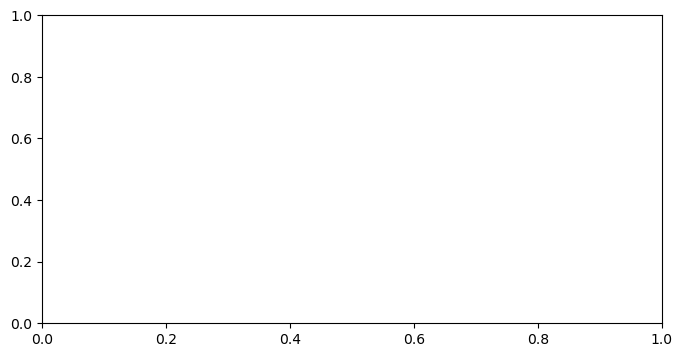

In [17]:
DR_vs_2D_l55_LAT = DR_vertslice_2D_lat.sel(n_scales=3)
lat=ds['latitude']
lev=ds['level']
fig,ax=plt.subplots(figsize=(8,4))
CS = plt.contourf(lat,lev,DR_vs_2D_l55_LAT.T,cmap='bwr',extend='both',levels=np.linspace(-0.5,0.5,101))
plt.gca().invert_yaxis() # The data is sorted by level index (index 12 = 1000hPa)
ax.set_xlim([-85,85])
plt.ylabel('Height (hPa)')
plt.xlabel(r'Latitude ($^\circ$N)')
# plt.xticks([])
plt.title(r'$\ell$ = 220 km | DYAMOND Summer | ERA5')

cbar = plt.colorbar(CS)
cbar.set_label(r'Longitudinally averaged $D_\ell(\mathbf{u})$ (m$^2$s$^{-3}$)')
# cbar.set_ticks(np.linspace(-5e-5,5e-5,11))
cbar.formatter = ticker.ScalarFormatter()
cbar.formatter.set_scientific(True)
cbar.formatter.set_powerlimits((-3, 3))
cbar.update_ticks()
cbar.set_ticks([-0.5,0,0.5])

# plt.savefig('/home/users/emg97/emgPlots/LO_verticalslice_LAT_l220km_ERA5.png',dpi=600,bbox_inches='tight')

##### Spectral structure plots

In [118]:
ds = xr.open_dataset('/gws/nopw/j04/kscale/USERS/emg/data/LoSSETT_out/channel_n2560_RAL3p2/DRdir2dt_Nlmax40_kscaleRAL3n2560_0p5_20160909.nc')
# Dl_TM_1Dspec_20160801 = ds['LoSSET_DR'].mean(dim=['latitude','longitude','time'])
Dl = ds['LoSSET_DR']
DlR = Dl.where((~np.isinf(Dl)))
DlR

<xarray.DataArray 'LoSSET_DR' (n_scales: 40, longitude: 720, latitude: 133,
                               level: 12, time: 8)> Size: 3GB
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]])
Coordinates:
  * latitude   (latitude) float64 1kB -40.0 -39.5 -39.0 -38.5 ... 25.0 25.5 26.0
  * longitude  (longitude) float64 6kB -180.0 -179.5 -179.0 ... 179.0 179.5
  * level      (level) int64 96B 100 150 200 250 300 ... 600 700 850 925 1000
  * n_scales   (n_scales) int64 320B 0 1 2 3 4 5 6 7 ... 32 33 34 35 36 37 38 39
  * time       (time) datetime64[ns] 64B 2016-09-09T03:00:00 ... 2016-09-10

In [173]:
Dl_40l_lonslice_MC_1d.max()

<xarray.DataArray 'LoSSET_DR' ()> Size: 8B
array(0.00012445)
Coordinates:
    n_scales  int64 8B 39

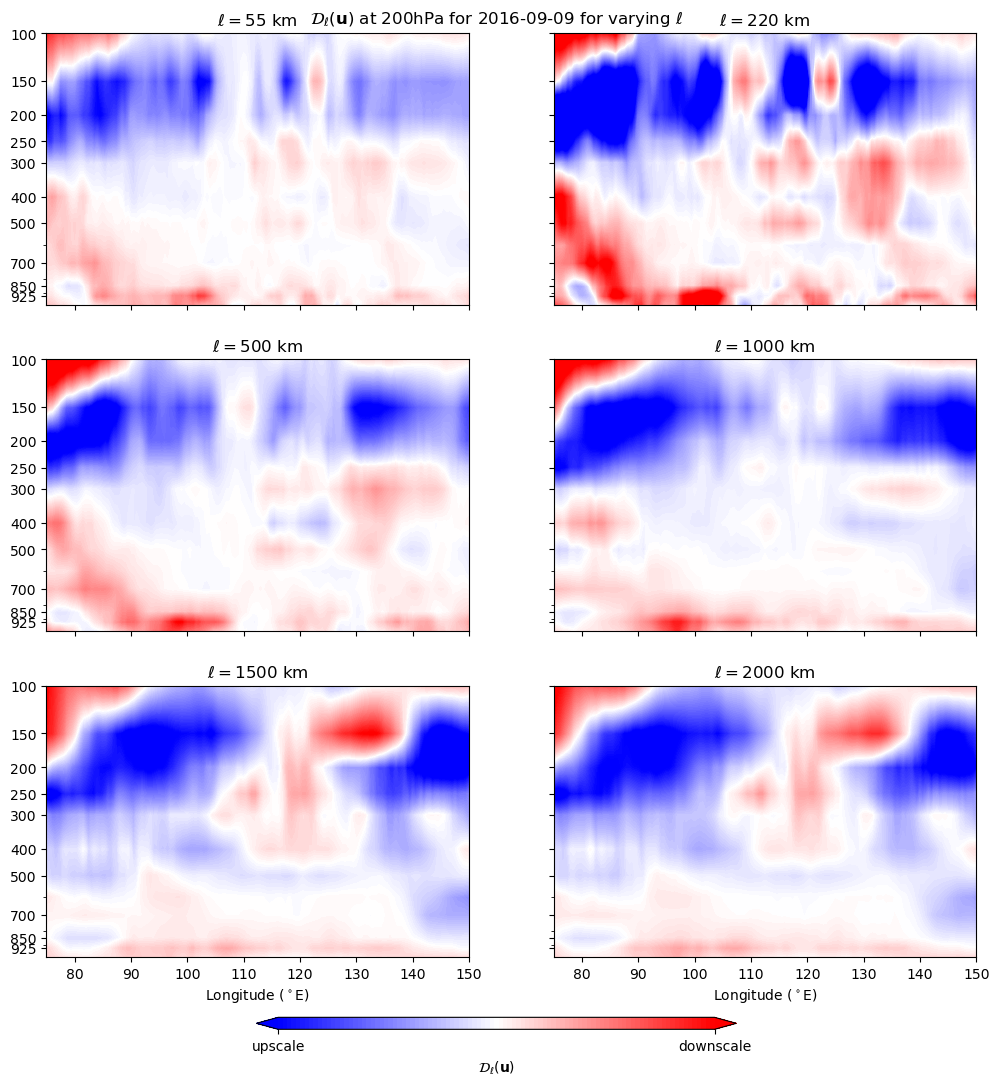

In [206]:
Dl_40l_lonslice_MC_1d = DlR.sel(n_scales=39,longitude=slice(75,150),latitude=slice(-5,5)).mean(dim=['latitude','time'])
Dl_30l_lonslice_MC_1d = DlR.sel(n_scales=29,longitude=slice(75,150),latitude=slice(-5,5)).mean(dim=['latitude','time'])
Dl_20l_lonslice_MC_1d = DlR.sel(n_scales=19,longitude=slice(75,150),latitude=slice(-5,5)).mean(dim=['latitude','time'])
Dl_10l_lonslice_MC_1d = DlR.sel(n_scales=9,longitude=slice(75,150),latitude=slice(-5,5)).mean(dim=['latitude','time'])
Dl_5l_lonslice_MC_1d = DlR.sel(n_scales=4,longitude=slice(75,150),latitude=slice(-5,5)).mean(dim=['latitude','time'])
Dl_1l_lonslice_MC_1d = DlR.sel(n_scales=0,longitude=slice(75,150),latitude=slice(-5,5)).mean(dim=['latitude','time'])

lon = Dl_40l_lonslice_MC_1d['longitude']
lev = Dl_40l_lonslice_MC_1d['level']

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True, sharey=True)  # Shared axes
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axes

ax1.contourf(lon, lev, -Dl_1l_lonslice_MC_1d.T, levels=np.linspace(-5e-3,5e-3,100), cmap='bwr', extend='both')
ax1.set_title(r'$\ell=55$ km')

ax2.contourf(lon, lev, -Dl_5l_lonslice_MC_1d.T, levels=np.linspace(-10,10,100), cmap='bwr', extend='both')
ax2.set_title(r'$\ell=220$ km')

ax3.contourf(lon, lev, -Dl_10l_lonslice_MC_1d.T, levels=np.linspace(-10,10,100), cmap='bwr', extend='both')
ax3.set_title(r'$\ell=500$ km')

ax4.contourf(lon, lev, -Dl_20l_lonslice_MC_1d.T, levels=np.linspace(-1e9,1e9,100), cmap='bwr', extend='both')
ax4.set_title(r'$\ell=1000$ km')

ax5.contourf(lon, lev, -Dl_30l_lonslice_MC_1d.T, levels=np.linspace(-0.5e38,0.5e38,100), cmap='bwr', extend='both')
ax5.set_xlabel(r'Longitude ($^\circ$E)')
ax5.set_title(r'$\ell=1500$ km')

cf = ax6.contourf(lon, lev, -Dl_40l_lonslice_MC_1d.T, levels=np.linspace(-1e-4,1e-4,100), cmap='bwr', extend='both')
ax6.set_yscale('log')
pressure_levels = [925, 850, 700, 500, 400, 300, 250, 200, 150, 100]
ax6.set_yticks(pressure_levels)
ax6.invert_yaxis()
ax6.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax6.yaxis.set_minor_formatter(ticker.NullFormatter())
ax6.set_xlabel(r'Longitude ($^\circ$E)')
ax6.set_title(r'$\ell=2000$ km')

cbar_ax1 = fig.add_axes([0.3, 0.05, 0.4, 0.01])  # [left, bottom, width, height]
cbar1 = fig.colorbar(cf, cax=cbar_ax1, orientation='horizontal')
cbar1.set_label(r'$\mathcal{D}_\ell(\mathbf{u})$')
tick_positions1 = [-1e-4, 1e-4]
tick_labels1 = ['upscale', 'downscale']
cbar1.set_ticks(tick_positions)
cbar1.set_ticklabels(tick_labels)

plt.suptitle(r'$\mathcal{D}_\ell(\mathbf{u})$ at 200hPa for 2016-09-09 for varying $\ell$',y=0.9)
fig.savefig('/home/users/emg97/emgPlots/LO_6panel_lonslice_manyl_brokenq.png',dpi=300)

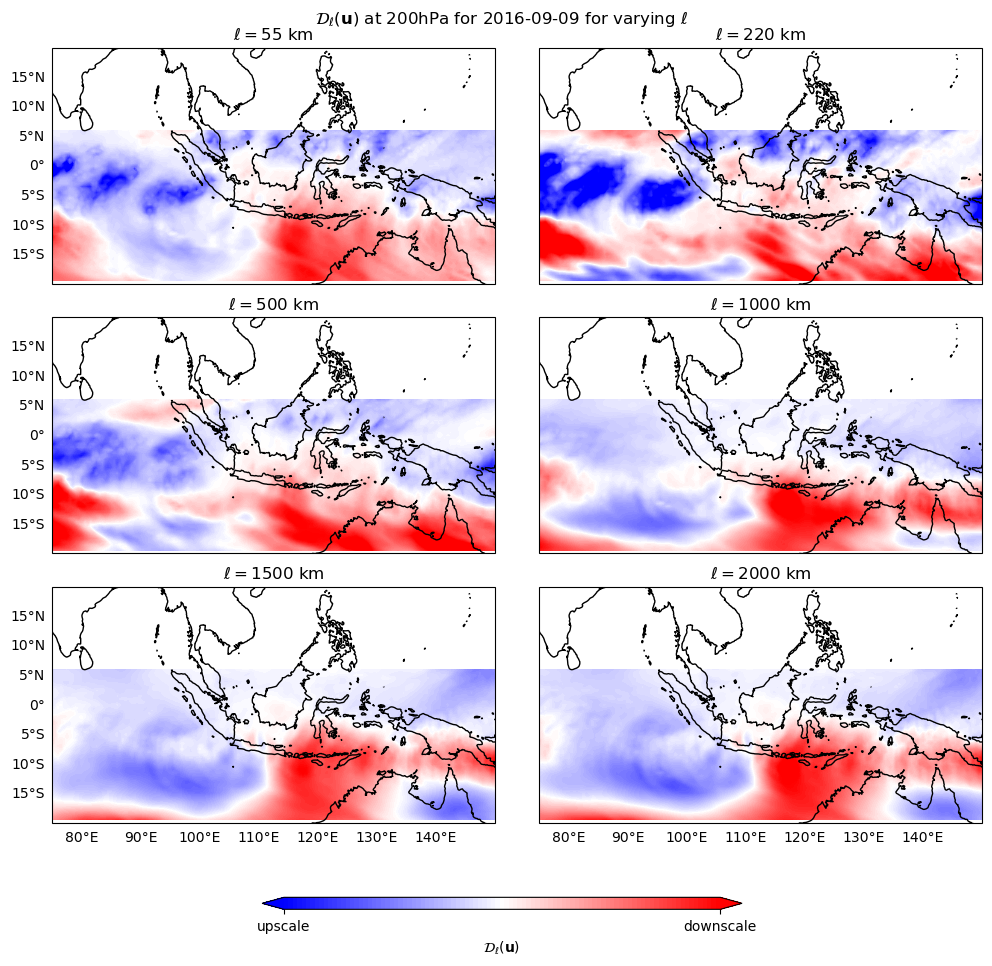

In [158]:
Dl_40l_200hPa_MC_1t = DlR.sel(n_scales=39,longitude=slice(75,150),latitude=slice(-20,20),level=200).mean(dim='time')
Dl_30l_200hPa_MC_1t = DlR.sel(n_scales=29,longitude=slice(75,150),latitude=slice(-20,20),level=200).mean(dim='time')
Dl_20l_200hPa_MC_1t = DlR.sel(n_scales=19,longitude=slice(75,150),latitude=slice(-20,20),level=200).mean(dim='time')
Dl_10l_200hPa_MC_1t = DlR.sel(n_scales=9,longitude=slice(75,150),latitude=slice(-20,20),level=200).mean(dim='time')
Dl_5l_200hPa_MC_1t = DlR.sel(n_scales=4,longitude=slice(75,150),latitude=slice(-20,20),level=200).mean(dim='time')
Dl_1l_200hPa_MC_1t = DlR.sel(n_scales=0,longitude=slice(75,150),latitude=slice(-20,20),level=200).mean(dim='time')



lon = Dl_40l_200hPa_MC_1t['longitude']
lat = Dl_40l_200hPa_MC_1t['latitude']

fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(wspace=0.1, hspace=-0.3)

# Create each subplot manually
ax1 = fig.add_subplot(321, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(322, projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(323, projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(324, projection=ccrs.PlateCarree())
ax5 = fig.add_subplot(325, projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(326, projection=ccrs.PlateCarree())

# Set extent and add features for each subplot
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_extent([75, 150, -20, 20], crs=ccrs.PlateCarree())
    ax.coastlines()

ax1.contourf(lon,lat,-Dl_1l_200hPa_MC_1t.T,levels=np.linspace(-1e-2,1e-2,100), cmap='bwr',extend='both')
ax1.set_title(r'$\ell=55$ km')
gl1 = ax1.gridlines(draw_labels=True, lw=0)
gl1.right_labels = False
gl1.top_labels = False
gl1.bottom_labels=False

ax2.contourf(lon,lat,-Dl_5l_200hPa_MC_1t.T,levels=np.linspace(-30,30,100), cmap='bwr',extend='both')
ax2.set_title(r'$\ell=220$ km')
gl2 = ax2.gridlines(draw_labels=True, lw=0)
gl2.right_labels = False
gl2.top_labels = False
gl2.bottom_labels=False
gl2.left_labels=False

ax3.contourf(lon,lat,-Dl_10l_200hPa_MC_1t.T,levels=np.linspace(-30,30,100), cmap='bwr',extend='both')
ax3.set_title(r'$\ell=500$ km')
gl3 = ax3.gridlines(draw_labels=True, lw=0)
gl3.right_labels = False
gl3.top_labels = False
gl3.bottom_labels=False

ax4.contourf(lon,lat,-Dl_20l_200hPa_MC_1t.T,levels=np.linspace(-5e9,5e9,100), cmap='bwr',extend='both')
ax4.set_title(r'$\ell=1000$ km')
gl4 = ax4.gridlines(draw_labels=True, lw=0)
gl4.right_labels = False
gl4.top_labels = False
gl4.left_labels=False
gl4.bottom_labels=False

ax5.contourf(lon,lat,-Dl_30l_200hPa_MC_1t.T,levels=np.linspace(-3e38,3e38,100), cmap='bwr',extend='both')
ax5.set_title(r'$\ell=1500$ km')
gl5 = ax5.gridlines(draw_labels=True, lw=0)
gl5.right_labels = False
gl5.top_labels = False

c = ax6.contourf(lon,lat,-Dl_40l_200hPa_MC_1t.T, levels=np.linspace(-5e-4,5e-4,100), cmap='bwr',extend='both')
ax6.set_title(r'$\ell=2000$ km')
gl6 = ax6.gridlines(draw_labels=True, lw=0)
gl6.right_labels = False
gl6.top_labels = False
gl6.left_labels=False

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.01])  # [left, bottom, width, height]
cbar = fig.colorbar(c, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'$\mathcal{D}_\ell(\mathbf{u})$')
tick_positions = [-5e-4, 5e-4]
tick_labels = ['upscale', 'downscale']

# Set ticks and labels
cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)

plt.suptitle(r'$\mathcal{D}_\ell(\mathbf{u})$ at 200hPa for 2016-09-09 for varying $\ell$',y=0.85)
fig.savefig('/home/users/emg97/emgPlots/LO_6panel_manyl_broken.png',dpi=300)

In [65]:
Dl_TM_1D = Dl.where((~np.isinf(Dl) & (Dl < 1e10) & (Dl > -1e10))).mean(dim=['time','latitude','longitude'],skipna=True)

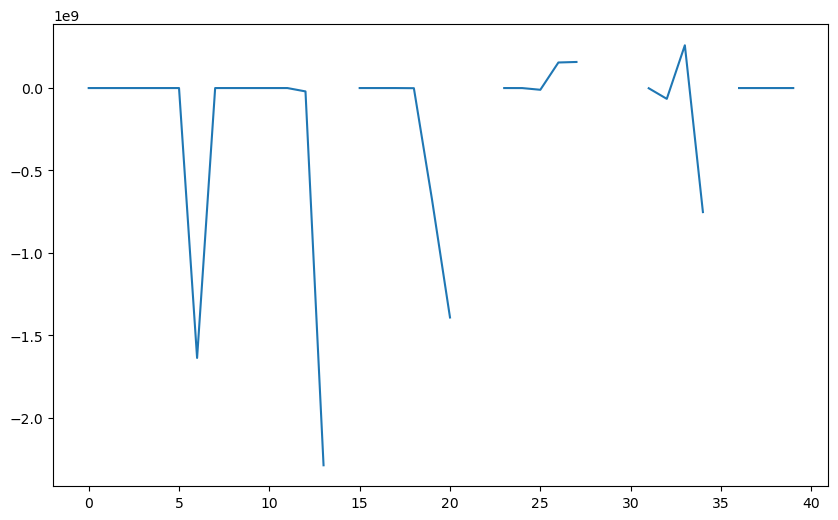

In [66]:
colors = plt.cm.inferno(np.linspace(0, 1, 12))
plt.figure(figsize=(10, 6))

plt.plot(Dl_TM_1D.sel(level=200))